# Pokemon Analsysis (EDA)
### Just for refernce 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import squarify
warnings.filterwarnings('ignore')

Importing Necessary Modules

In [2]:
pokemon_df = pd.read_csv('pokemons.csv', encoding='ISO-8859-1')
pokemon_df.head(10)
#Normal read_csv threw the error 
#UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 35160-35161: invalid continuation byte

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
0,Bulbasaur,NaN,GRASS,POISON,49,49,45,65,65,45,318
1,Ivysaur,NaN,GRASS,POISON,62,63,60,80,80,60,405
2,Venusaur,NaN,GRASS,POISON,82,83,80,100,100,80,525
3,Venusaur,Mega Venusaur,GRASS,POISON,100,123,80,122,120,80,625
4,Charmander,NaN,FIRE,NaN,52,43,39,60,50,65,309
5,Charmeleon,NaN,FIRE,NaN,64,58,58,80,65,80,405
6,Charizard,NaN,FIRE,FLYING,84,78,78,109,85,100,534
7,Charizard,Mega Charizard X,FIRE,DRAGON,130,111,78,130,85,100,634
8,Charizard,Mega Charizard Y,FIRE,FLYING,104,78,78,159,115,100,634
9,Squirtle,NaN,WATER,NaN,48,65,44,50,64,43,314


In [3]:
pokemon_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Attack,1045.0,80.466986,32.413665,5.0,55.0,77.0,100.0,190.0
Defense,1045.0,74.661244,31.237903,5.0,50.0,70.0,90.0,250.0
HP,1045.0,70.067943,26.671411,1.0,50.0,68.0,82.0,255.0
Sp.Attack,1045.0,73.022010,32.724797,10.0,50.0,65.0,95.0,194.0
Sp.Defense,1045.0,72.288995,28.074148,20.0,50.0,70.0,90.0,250.0
Speed,1045.0,68.807656,30.210094,5.0,45.0,65.0,90.0,200.0
Total,1045.0,439.314833,121.970701,175.0,330.0,458.0,515.0,1125.0


- `pokemon_df.isnull()`: Checks if each element in the dataframe is missing (null) and creates a new table with `True` for missing elements and `False` for non-missing elements.

- `.sum()`: Adds up the `True` values (representing missing elements) for each column in the table, giving you a count of missing values in each column.  
**From data below it is clear that in column Name2 and Secondary type there are 870 and 492 NaN in the DataFrame**

In [4]:
pokemon_df.isnull().sum()

Name                0
Name2             870
Primary Type        0
Secondary type    492
Attack              0
Defense             0
HP                  0
Sp.Attack           0
Sp.Defense          0
Speed               0
Total               0
dtype: int64

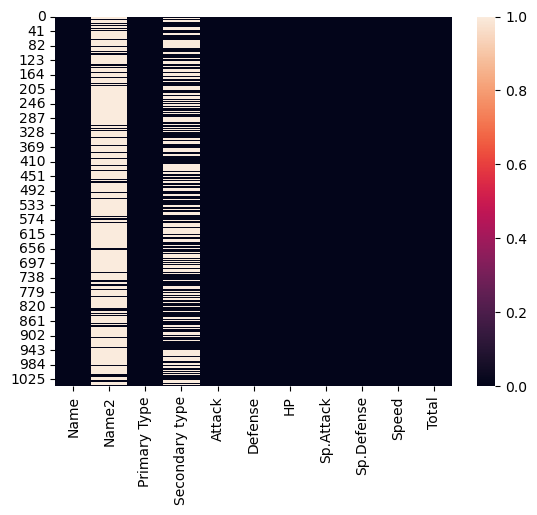

In [37]:
ax = sns.heatmap(pokemon_df.isnull());
#From descibe we know that Name2 = 870 and secomdary type = 492 i.e no of NaN
#we can also visualize it via heatmap .
# Dark blue = means it is not empty
# White = It means its empty

Now lets find the Types of pokemon that is primary ,secondary ( grass ,fire ,water etc..)
- Using `nunique()` method

In [6]:
print('Unique types of pokemon[Primary pokemon]: ',pokemon_df['Primary Type'].nunique())
print('Unique types of pokemon[Secondary pokemon]: ',pokemon_df['Secondary type'].nunique())

Unique types of pokemon[Primary pokemon]:  18
Unique types of pokemon[Secondary pokemon]:  18


Now next we shall plot a countplot type of graph and understand the  
types of primary pokemon , using matplot and seaborn 

"\nThis is a comment , no need to add xlabel and ylabel because in seaborn defautly it takes \nthe one mentioned in .csv / DataFrame.\nax.set( title =  ' ' ,)\n        ylabel = ' ' ,\n        xlabel = ' ' ,\n        fontsize = 12)\n"

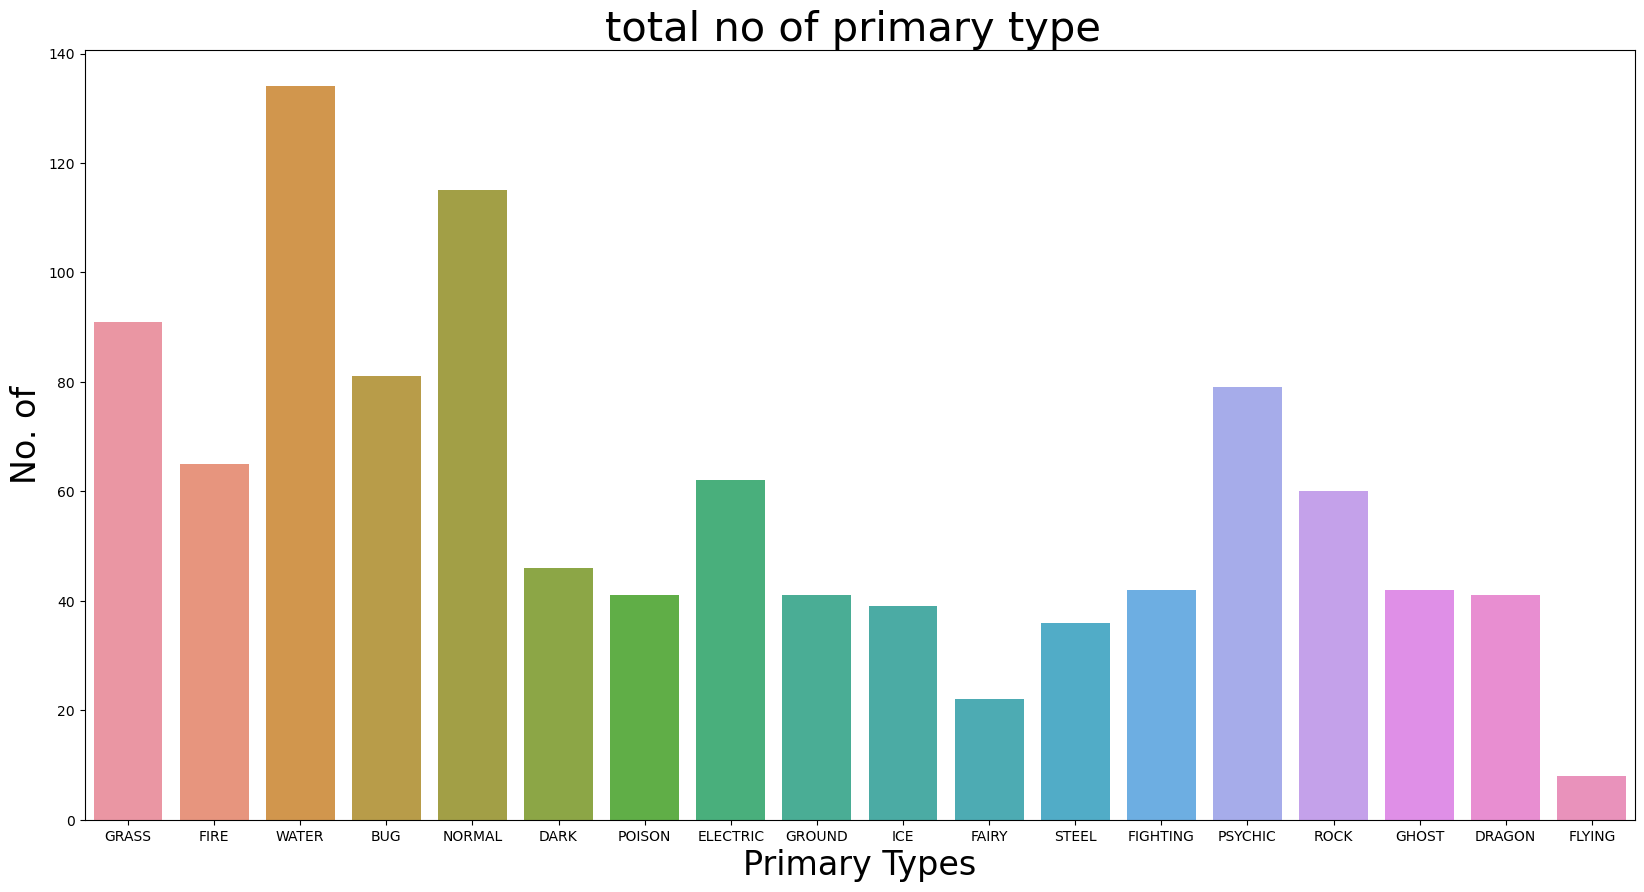

In [38]:
fig , ax = plt.subplots(figsize = (20,10))
#sns.countplot(data  = pokemon_df , x = pokemon_df['Primary Type']);
ax = sns.countplot(data  = pokemon_df , x = pokemon_df['Primary Type']);
ax.set_title('total no of primary type ' , fontsize = 30)
ax.set_xlabel('Primary Types' , fontsize = 24)
ax.set_ylabel('No. of' , fontsize = 24)
'''
This is a comment , no need to add xlabel and ylabel because in seaborn defautly it takes 
the one mentioned in .csv / DataFrame.
ax.set( title =  ' ' ,)
        ylabel = ' ' ,
        xlabel = ' ' ,
        fontsize = 12)
'''


From the above graph it is clear that we have large no of `water pokemon` and least no of `flying pokemon` 
in the primary type dataset

Now lets plot and see the different kinds of `Secondary Pokemon`

Text(0, 0.5, 'Count')

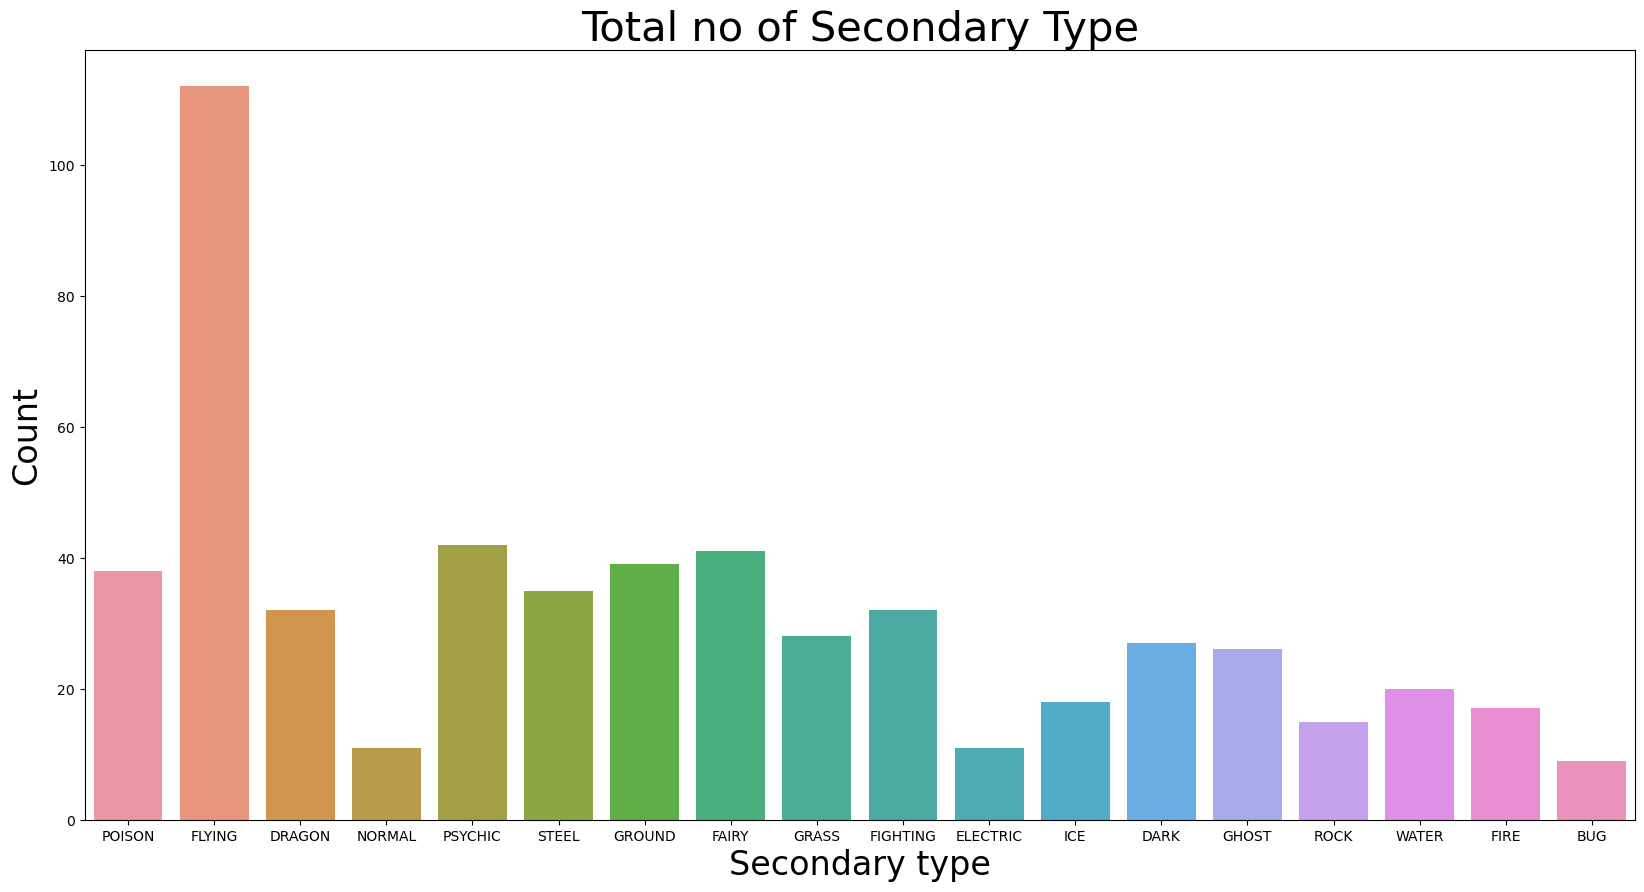

In [8]:
fig , ax = plt.subplots(figsize = (20,10))
ax = sns.countplot(data = pokemon_df , x = pokemon_df['Secondary type'])
ax.set_title('Total no of Secondary Type' , fontsize = 30)
ax.set_xlabel('Secondary type' ,fontsize = 24)
ax.set_ylabel('Count' , fontsize = 24)


Now lets create a heatmap and understand the relation between each column

- `_, (ax, cbar_ax) = plt.subplots(2, gridspec_kw={"height_ratios": (1, 0.04), 'hspace': 0.3}, figsize=(18, 9))`
This line creates a 2x1 grid of subplots. 
    -  `_` is used to ignore a value.
    - `(ax, cbar_ax)` unpacks a tuple into two variables: `ax` for the main plot and `cbar_ax` for the         color bar. 
    - The `gridspec_kw` dictionary sets the height ratios of the subplots (1 and 0.04) and the vertical         spacing ('hspace') between them. 
    - `figsize` determines the size of the entire plot (18 units wide and 9 units high).

This code is essentially preparing a layout for two plots, one for the main content and the other for the color bar, with specific size and spacing settings to visualize data effectively.



- `sns.heatmap(...)`: This part starts by using the sns(seaborn) library  to create a heatmap. A heatmap is like a colorful grid that helps you see relationships between different things.



- `(dataset.loc[:,['Attack','Defense','HP','Sp.Attack','Sp.Defense','Speed']]).corr()`: 
Here, we're taking a part of a 'dataset' and selecting only specific attributes like Attack, Defense, HP, etc. Then, we calculate the correlations between these attributes. Correlation is a measure of how one attribute is related to another. 



- `annot=True`: This means we want to show the actual numbers (correlation values) on the heatmap to make it easier to understand.

- `fmt="3.3f"`: It's just a way to format the numbers to look nice, with three digits before the decimal point and three after.

- `vmin=-1` and `vmax=1`: These set the range for the colors on the heatmap. In this case, it's from -1 (negative correlation) to 1 (positive correlation).

- `ax=ax`: This part tells the code where to put the heatmap on a set of subplots or axes. It uses the 'ax' variable, which is likely defined elsewhere.

- `cbar_ax=cbar_ax`: This is about where to put the color bar, which explains the colors used in the heatmap. It's also probably defined elsewhere using the 'cbar_ax' variable.

- `cbar_kws={"orientation": "horizontal"}`: This sets the color bar to be horizontal, so it's easier to read.

- `cmap="plasma"`: Finally, this sets the color scheme for the heatmap. In this case, it's using a color scheme called "plasma" to make it visually appealing.

So, in summary, this code is all about creating a colorful grid (heatmap) that helps us understand how different attributes in a dataset are related to each other. It displays the actual numbers, uses specific formatting, and controls the colors to make it informative and visually pleasing.

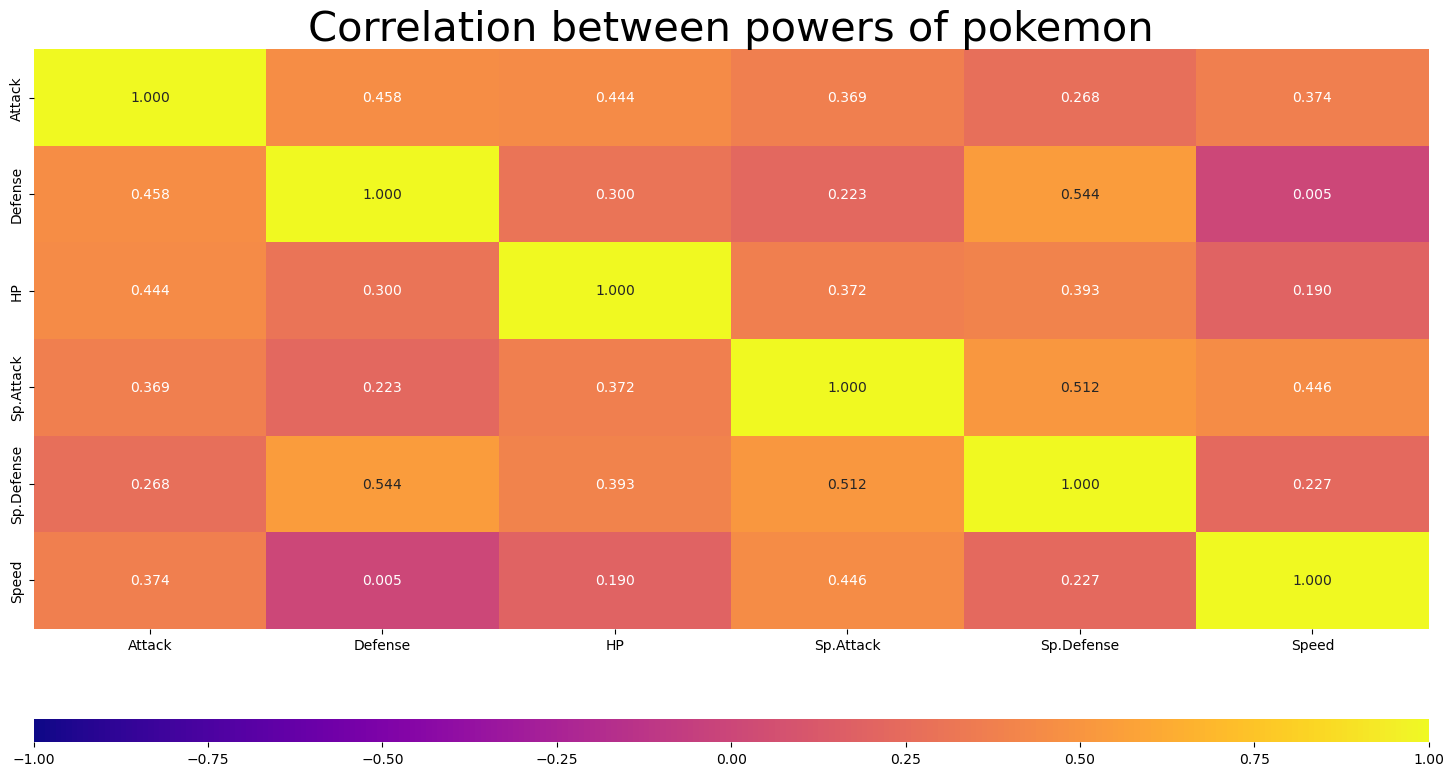

In [40]:
_,(ax,cbar_ax) = plt.subplots(2 , gridspec_kw = {"height_ratios":(1,.04),'hspace':.3}, figsize = (18,9))

ax = sns.heatmap((pokemon_df[['Attack','Defense','HP','Sp.Attack','Sp.Defense','Speed']]).corr() , 
            annot = True ,
            fmt = '3.3f' , 
            vmin = -1 ,
            vmax = 1 , 
            ax = ax ,
            cbar_ax = cbar_ax ,
            cmap = 'plasma' ,
            cbar_kws = {'orientation' : 'horizontal'} )
ax.set_title('Correlation between powers of pokemon' , fontsize = (30));
            

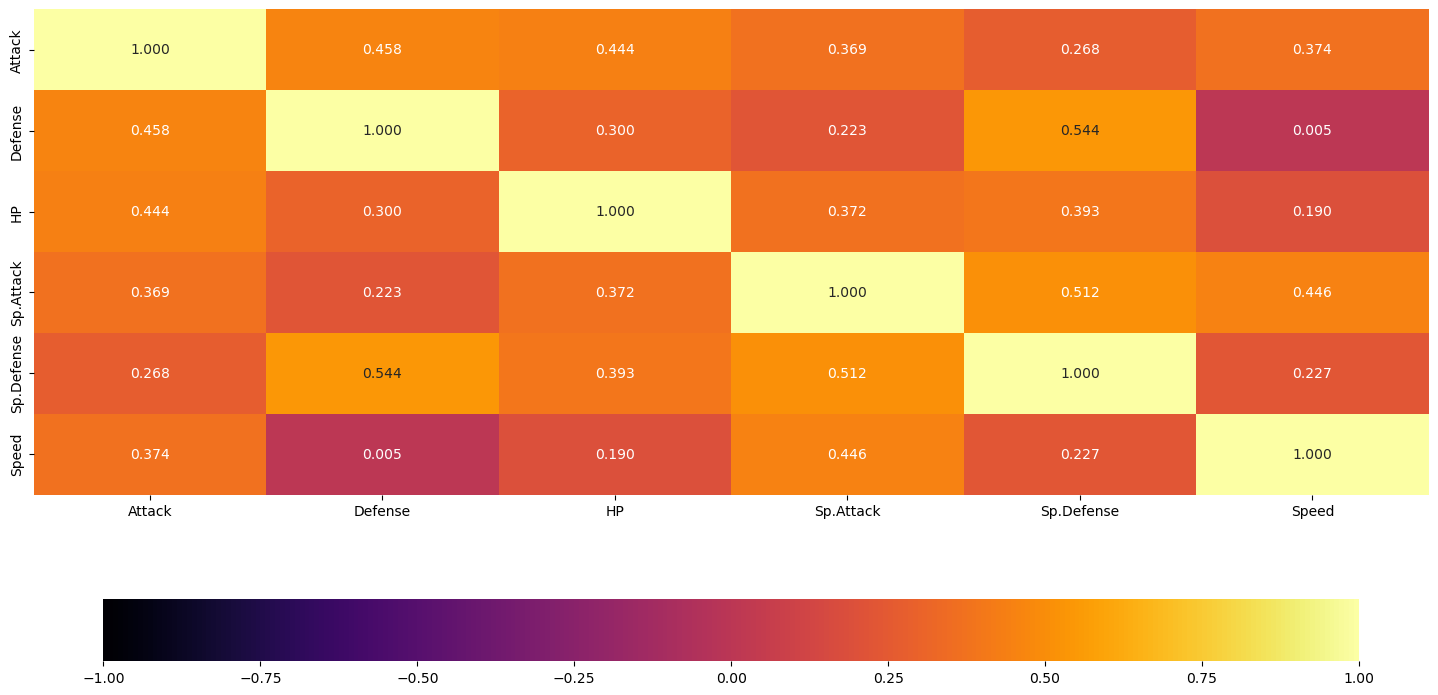

In [44]:
plt.subplots(figsize = (18,9))
sns.heatmap((pokemon_df[['Attack','Defense','HP','Sp.Attack','Sp.Defense','Speed']]).corr() , 
            annot = True ,
            fmt = '3.3f' , 
            vmin = -1 ,
            vmax = 1 , 
            cmap = 'inferno' ,
            cbar_kws = {'orientation' : 'horizontal','shrink' : 0.9} )
ax.set_title('Correlation between powers of pokemon' , fontsize = (30));

From the graph its clear that 
* Speed and Defence have the worst relaionship (0.005)
* Special Defence and Defence have the best Relationship (0.544)

In [11]:
pokemon_df

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
0,Bulbasaur,NaN,GRASS,POISON,49,49,45,65,65,45,318
1,Ivysaur,NaN,GRASS,POISON,62,63,60,80,80,60,405
2,Venusaur,NaN,GRASS,POISON,82,83,80,100,100,80,525
3,Venusaur,Mega Venusaur,GRASS,POISON,100,123,80,122,120,80,625
4,Charmander,NaN,FIRE,NaN,52,43,39,60,50,65,309
...,...,...,...,...,...,...,...,...,...,...,...
1040,Glastrier,NaN,ICE,NaN,145,130,100,65,110,30,580
1041,Spectrier,NaN,GHOST,NaN,65,60,100,145,80,130,580
1042,Calyrex,NaN,PSYCHIC,GRASS,80,80,100,80,80,80,500
1043,Calyrex,Ice Rider,PSYCHIC,ICE,165,150,100,85,130,50,680


Now lets see which row has the highest Total.
using..  
`pokemon_df[pokemon_df['Total'] == pokemon_df['Total'].max()]
`

In [12]:
pokemon_df[pokemon_df['Total'] == pokemon_df['Total'].max() ]

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
1033,Eternatus,Eternamax,POISON,DRAGON,115,250,255,125,250,130,1125


So Eternatus's  
Primary Type : POISON  
Secondary type : DRAGON   
lets find this using code   
`pokemon_df[pokemon_df['Total'] == pokemon_df['Total'].max()] ['Primary Type']`

In [13]:
print(pokemon_df[pokemon_df['Total'] == pokemon_df['Total'].max()] ['Primary Type'], '\n')
print(pokemon_df[pokemon_df['Total'] == pokemon_df['Total'].max()] ['Secondary type'])

1033    POISON
Name: Primary Type, dtype: object 

1033    DRAGON
Name: Secondary type, dtype: object


Now lets find the pokemon with highest Attack

In [14]:
pokemon_df[pokemon_df['Attack'] == pokemon_df['Attack'].max()]

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
194,Mewtwo,Mega Mewtwo X,PSYCHIC,FIGHTING,190,100,106,154,100,130,780


## Filtering
#### Single Filter

For single filter ,at first lets take all pokemon with Attack more than 150 and then we shall also look at all pokemons with Defense more than 150 
 - We can do this in 3 methods

**Method 1**

In [15]:
attack_M1 = pokemon_df[pokemon_df['Attack'] > 150]
attack_M1.head(8)

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
164,Pinsir,Mega Pinsir,BUG,FLYING,155,120,65,65,90,105,600
168,Gyarados,Mega Gyarados,WATER,DARK,155,109,95,70,130,81,640
194,Mewtwo,Mega Mewtwo X,PSYCHIC,FIGHTING,190,100,106,154,100,130,780
264,Heracross,Mega Heracross,BUG,FIGHTING,185,115,80,40,105,75,600
301,Tyranitar,Mega Tyranitar,ROCK,DARK,164,150,100,95,120,71,700
312,Blaziken,Mega Blaziken,FIRE,FIGHTING,160,80,80,130,80,100,630
348,Slaking,NaN,NORMAL,NaN,160,100,150,95,65,100,670
425,Banette,Mega Banette,GHOST,NaN,165,75,64,93,83,75,555


**Method 2**

In [16]:
attack_2 = pokemon_df['Attack'].map(lambda x : x >150) 
# attack_2 is not a dataframe
pokemon_df[attack_2].head(8)

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
164,Pinsir,Mega Pinsir,BUG,FLYING,155,120,65,65,90,105,600
168,Gyarados,Mega Gyarados,WATER,DARK,155,109,95,70,130,81,640
194,Mewtwo,Mega Mewtwo X,PSYCHIC,FIGHTING,190,100,106,154,100,130,780
264,Heracross,Mega Heracross,BUG,FIGHTING,185,115,80,40,105,75,600
301,Tyranitar,Mega Tyranitar,ROCK,DARK,164,150,100,95,120,71,700
312,Blaziken,Mega Blaziken,FIRE,FIGHTING,160,80,80,130,80,100,630
348,Slaking,NaN,NORMAL,NaN,160,100,150,95,65,100,670
425,Banette,Mega Banette,GHOST,NaN,165,75,64,93,83,75,555


**Method 3**  
Using python if else statement

In [17]:
attack_list = []
for atk in pokemon_df['Attack'] : 
    if atk > 150 : 
        attack_list.append(True)
    else : 
        attack_list.append(False)
attack_M3 = pd.Series(attack_list)
pokemon_df[attack_M3].head(8)

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
164,Pinsir,Mega Pinsir,BUG,FLYING,155,120,65,65,90,105,600
168,Gyarados,Mega Gyarados,WATER,DARK,155,109,95,70,130,81,640
194,Mewtwo,Mega Mewtwo X,PSYCHIC,FIGHTING,190,100,106,154,100,130,780
264,Heracross,Mega Heracross,BUG,FIGHTING,185,115,80,40,105,75,600
301,Tyranitar,Mega Tyranitar,ROCK,DARK,164,150,100,95,120,71,700
312,Blaziken,Mega Blaziken,FIRE,FIGHTING,160,80,80,130,80,100,630
348,Slaking,NaN,NORMAL,NaN,160,100,150,95,65,100,670
425,Banette,Mega Banette,GHOST,NaN,165,75,64,93,83,75,555


### Apply single filtering for Defences for practice

**Method 1**

In [18]:
Defence_M1 = pokemon_df[pokemon_df["Defense"] > 150]
Defence_M1.head(8)

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
106,Slowbro,Mega Slowbro,WATER,PSYCHIC,75,180,95,130,80,30,590
121,Cloyster,NaN,WATER,ICE,95,180,50,85,45,70,525
126,Onix,NaN,ROCK,GROUND,45,160,35,30,45,70,385
255,Steelix,NaN,STEEL,GROUND,85,200,75,55,65,30,510
256,Steelix,Mega Steelix,STEEL,GROUND,125,230,75,55,95,30,610
262,Shuckle,NaN,BUG,ROCK,10,230,20,10,230,5,505
367,Aggron,NaN,STEEL,ROCK,110,180,70,60,60,50,530
368,Aggron,Mega Aggron,STEEL,NaN,140,230,70,60,80,50,630


**Method 2** : Lamda method

In [19]:
Defence_M2 = pokemon_df['Defense'].map(lambda x : x > 150)
pokemon_df[Defence_M2].head(8)

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
106,Slowbro,Mega Slowbro,WATER,PSYCHIC,75,180,95,130,80,30,590
121,Cloyster,NaN,WATER,ICE,95,180,50,85,45,70,525
126,Onix,NaN,ROCK,GROUND,45,160,35,30,45,70,385
255,Steelix,NaN,STEEL,GROUND,85,200,75,55,65,30,510
256,Steelix,Mega Steelix,STEEL,GROUND,125,230,75,55,95,30,610
262,Shuckle,NaN,BUG,ROCK,10,230,20,10,230,5,505
367,Aggron,NaN,STEEL,ROCK,110,180,70,60,60,50,530
368,Aggron,Mega Aggron,STEEL,NaN,140,230,70,60,80,50,630


**Method 3** using python `if else` and `list`

In [20]:
Defense_list = []
for Def in pokemon_df['Defense'] : 
    if Def > 150 : 
        Defense_list.append(True)
    else :
        Defense_list.append(False)
#Now all pokemon with defense greater than 150 will be stored in list 
Defense_M3 = pd.Series(Defense_list)
pokemon_df[Defense_M3].head(8)

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
106,Slowbro,Mega Slowbro,WATER,PSYCHIC,75,180,95,130,80,30,590
121,Cloyster,NaN,WATER,ICE,95,180,50,85,45,70,525
126,Onix,NaN,ROCK,GROUND,45,160,35,30,45,70,385
255,Steelix,NaN,STEEL,GROUND,85,200,75,55,65,30,510
256,Steelix,Mega Steelix,STEEL,GROUND,125,230,75,55,95,30,610
262,Shuckle,NaN,BUG,ROCK,10,230,20,10,230,5,505
367,Aggron,NaN,STEEL,ROCK,110,180,70,60,60,50,530
368,Aggron,Mega Aggron,STEEL,NaN,140,230,70,60,80,50,630


   ## Multiple Filtering 

We cant use `and` operator in pandas ,use `&` instead

In [21]:
attack_defence  = pokemon_df[ (pokemon_df['Attack'] > 120) & (pokemon_df['Defense'] > 120)]
attack_defence.head(8)

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
256,Steelix,Mega Steelix,STEEL,GROUND,125,230,75,55,95,30,610
261,Scizor,Mega Scizor,BUG,STEEL,150,140,70,65,100,75,600
301,Tyranitar,Mega Tyranitar,ROCK,DARK,164,150,100,95,120,71,700
368,Aggron,Mega Aggron,STEEL,NaN,140,230,70,60,80,50,630
447,Salamence,Mega Salamence,DRAGON,FLYING,145,130,95,120,90,120,700
450,Metagross,NaN,STEEL,PSYCHIC,135,130,80,95,90,70,600
451,Metagross,Mega Metagross,STEEL,PSYCHIC,145,150,80,105,110,110,700
461,Groudon,NaN,GROUND,NaN,150,140,100,100,90,90,670


## Groupby method in pandas

Here we are essentially calculating and printing the minimum 'Total' value for Pokémon with the primary type 'BUG'. `pokemon_df.groupby('Primary Type')['Total'].min()['BUG']`

In [22]:
pokemon_df.groupby('Primary Type')['Total'].min()['BUG']

180

In [23]:
Bug_data = pokemon_df[pokemon_df['Primary Type'] == 'BUG']  # its a dataframe
Bug_min = Bug_data['Total'].min() # it stores value i.e 180
print('Minimum total of Primary type BUG :', Bug_min)
print("Lets see which row is :- \n")
print('Row with minimum Total type for BUG  type : ')
Bug_data.loc[Bug_data['Total'] == Bug_min]

Minimum total of Primary type BUG : 180
Lets see which row is :- 

Row with minimum Total type for BUG  type : 


,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
960,Blipbug,NaN,BUG,NaN,20,20,25,25,45,45,180


Now lets see which pokemon is fire type as secondary and has least total

In [24]:
print('Fire(min) and its secondary', pokemon_df.groupby('Secondary type')['Total'].min()['FIRE'])

Fire(min) and its secondary 275


Now lets print that dataframe

In [51]:
#contains all pokemon with secondary type
fire_type = pokemon_df[pokemon_df['Secondary type'] == 'FIRE'] 
fire_min = fire_type.groupby('Secondary type')['Total'].min()['FIRE']
#now printing the row
fire_type.loc[fire_type['Total'] == fire_min]

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
711,Litwick,NaN,GHOST,FIRE,30,55,50,65,55,20,275



`pokemon_df.groupby('Primary Type')['Total'].min()['WATER']`  
**Code Breakdown**  
`.groupby('')` is the method.  
`{DataFrame}.groupby('Column name')[].min()['Items in same cokumn']`

Primary Type pokemon WATER ..and minimum Total

In [25]:
print('Water type primary pokemon :',pokemon_df.groupby('Primary Type')['Total'].min()['WATER'])

Watwer type primary pokemon type: 175


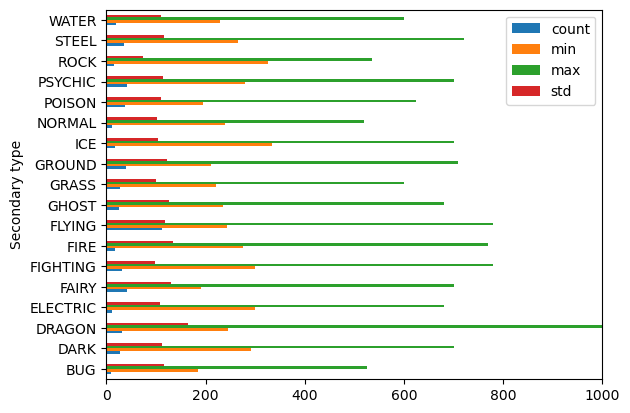

In [52]:
BarGraph = pokemon_df.groupby('Secondary type')['Total'].agg(['count','min','max','std'])
bar_width = 0.5
ax = BarGraph.plot( kind ='barh' ,
                   width = bar_width); #width is the thickness of bar
ax.set_xlim([0,1000])
y_spacing = 1.5
yticks = ax.get_yticks() # These are the original positions of the tick marks


Primary Type pokemon attack analysis

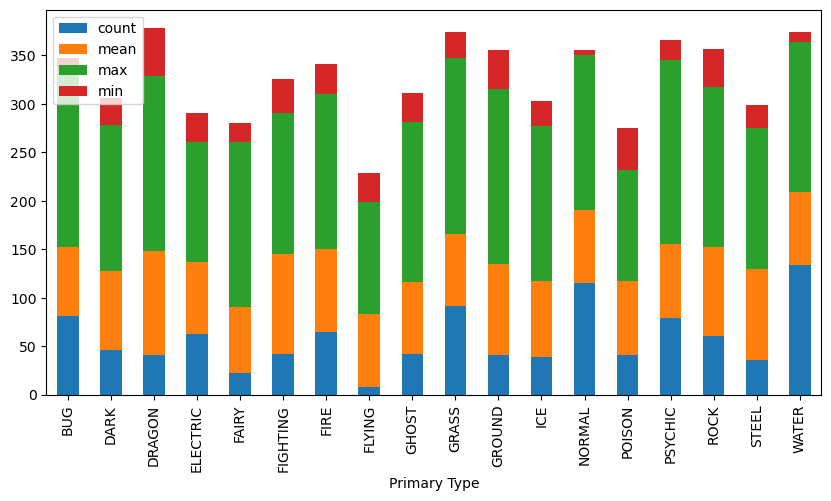

In [27]:
Attack_graph = pokemon_df.groupby('Primary Type')['Attack'].agg(['count' , 'mean', 'max', 'min'])
ax = Attack_graph.plot( figsize = (10,5) , 
                        kind = 'bar' , 
                        stacked = True ,
                       width = 0.5)
ax.legend(loc = 'upper left');



Now lets focus on Water pokemons

In [28]:
water_pokemons = pokemon_df[pokemon_df['Primary Type'] == 'WATER']
water_pokemons.head(8)

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
9,Squirtle,NaN,WATER,NaN,48,65,44,50,64,43,314
10,Wartortle,NaN,WATER,NaN,63,80,59,65,80,58,405
11,Blastoise,NaN,WATER,NaN,83,100,79,85,105,78,530
12,Blastoise,Mega Blastoise,WATER,NaN,103,120,79,135,115,78,630
72,Psyduck,NaN,WATER,NaN,52,48,50,65,50,55,320
73,Golduck,NaN,WATER,NaN,82,78,80,95,80,85,500
78,Poliwag,NaN,WATER,NaN,50,40,40,40,40,90,300
79,Poliwhirl,NaN,WATER,NaN,65,65,65,50,50,90,385


Check the `Pokemon` with the highest Total among the ``Water Pokemon``

In [29]:
water_pokemons[water_pokemons['Total'] == water_pokemons['Total'].max()]

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
460,Kyogre,Primal Kyogre,WATER,NaN,150,90,100,180,160,90,770


Now lets see all the primary water type pokemon with good Total  and plot a graph

In [30]:
water_pokemon_names = pokemon_df[(pokemon_df['Primary Type'] == 'WATER') & (pokemon_df['Total'] > 150)]['Name']
wpok_strength = pokemon_df[(pokemon_df['Primary Type'] == 'WATER') & (pokemon_df['Total'] > 500)]

In [31]:
water_pokemon_names

9          Squirtle
10        Wartortle
11        Blastoise
12        Blastoise
72          Psyduck
           ...     
970         Drednaw
982        Arrokuda
983     Barraskewda
1022      Dracovish
1023      Arctovish
Name: Name, Length: 134, dtype: object

In [53]:
wpok_strength.head(8)

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
11,Blastoise,NaN,WATER,NaN,83,100,79,85,105,78,530
12,Blastoise,Mega Blastoise,WATER,NaN,103,120,79,135,115,78,630
80,Poliwrath,NaN,WATER,FIGHTING,95,95,90,70,90,70,510
92,Tentacruel,NaN,WATER,POISON,70,65,80,80,120,100,515
106,Slowbro,Mega Slowbro,WATER,PSYCHIC,75,180,95,130,80,30,590
121,Cloyster,NaN,WATER,ICE,95,180,50,85,45,70,525
156,Starmie,NaN,WATER,PSYCHIC,75,85,60,100,85,115,520
167,Gyarados,NaN,WATER,FLYING,125,79,95,60,100,81,540


Now lets plot a graph of water pokemon with strength above 500


In [33]:
'''
fig, ax = plt.subplots(figsize=(20, 10))
# Bar plot for Water Pokemon names and their Total strength
ax.bar(water_pokemon_names, wpok_strength) 

#labelling 
ax.set_title("Water Pokemon Overall Strength Above 500", fontsize=24)
ax.set_xlabel("Name", fontsize=18)
ax.set_ylabel("Total", fontsize=18)
'''

'\nfig, ax = plt.subplots(figsize=(20, 10))\n# Bar plot for Water Pokemon names and their Total strength\nax.bar(water_pokemon_names, wpok_strength) \n\n#labelling \nax.set_title("Water Pokemon Overall Strength Above 500", fontsize=24)\nax.set_xlabel("Name", fontsize=18)\nax.set_ylabel("Total", fontsize=18)\n'

**Issue:**
- The `ax.bar()` function expects the x-values (positions of bars) and the y-values (heights of bars).
- In your code, `water_pokemon_names` is a numpy array of Pokémon names, and you tried to use it as the x-values, which caused a TypeError because numpy arrays are not directly hashable as x-values.

**Solution:**
- To resolve this issue, we need to provide numerical x-values for the bars, while ensuring that the Pokémon names are used as labels for readability.
- We can achieve this by using a sequence of numbers as the x-values, and then we set the x-axis labels to be the Pokémon names.
- Here's the corrected code:


**Explanation for a Beginner:**
- The issue occurred because we tried to use a list of Pokémon names directly as x-values for the bar plot. Matplotlib expects numerical x-values, so we needed to create a sequence of numbers (x-values) and use the Pokémon names as labels.
- The solution involves creating numerical x-values using the `range` function. These numbers serve as the positions of the bars on the x-axis.
- We then set these numerical x-values using `ax.set_xticks` and provide the Pokémon names as labels with `ax.set_xticklabels`. The `rotation=90` parameter is used to make sure the labels are displayed vertically for readability.
- By making these changes, the code correctly sets up the bar plot with Pokémon names as labels on the x-axis.

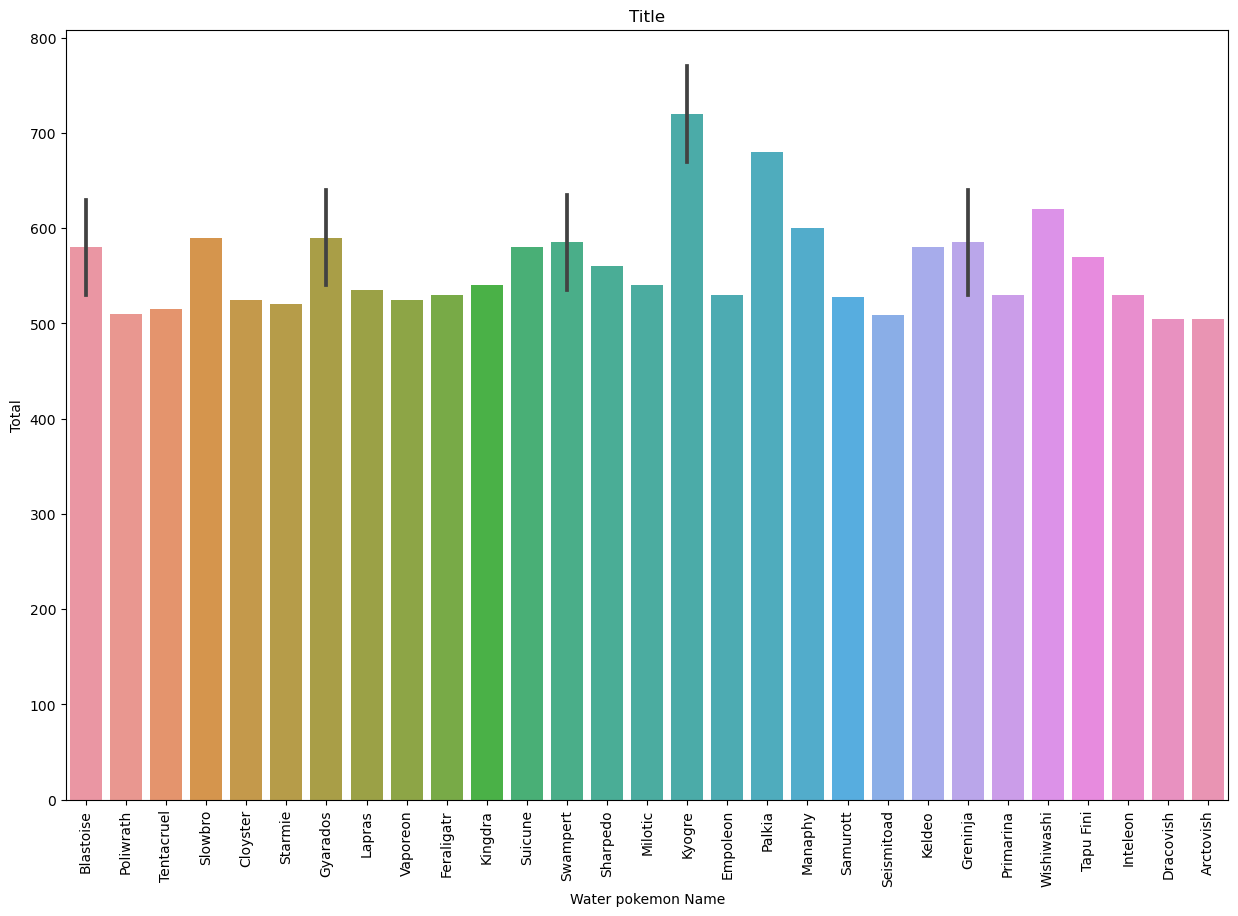

In [69]:
ax , fig = plt.subplots(figsize = (15,10))
ax = sns.barplot(data = wpok_strength , y = 'Total' ,x = 'Name')
ax.set( xlabel = 'Water pokemon Name' , 
        ylabel = 'Total',
       title = 'Title');
plt.xticks(rotation = 90); # this is necesary orelse itll look shabby

Now using scatter plot to see the relationship 


In [118]:
Water_Speed = pokemon_df[pokemon_df['Primary Type'] == "WATER"]['Speed'].iloc[0:60]
wpseed = pd.DataFrame(Water_Speed)
Fire_Speed = pokemon_df[pokemon_df['Primary Type'] == "FIRE"]['Speed'].iloc[0:60]
fspeed = pd.DataFrame(Fire_Speed)

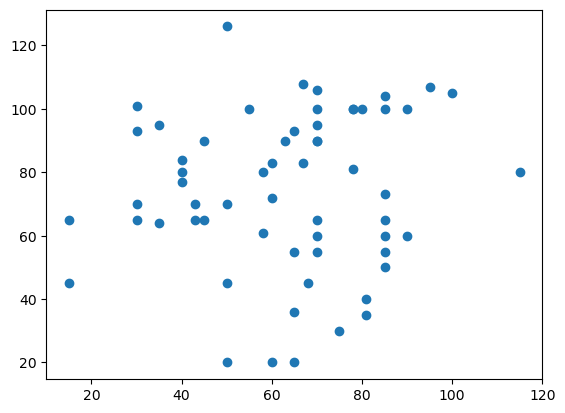

In [122]:
plt.scatter(wpseed , fspeed);

### pie chart

In [125]:
plt.pie([water_pokemon_names[water_pokemon_names['Speed'] > 100 ]['Speed'] ,labels = ''

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (3571694121.py, line 1)

### Relation between FIRE and WATER pokemon

In [126]:
fire_pokemon = pokemon_df[pokemon_df['Primary Type'] == 'FIRE']
fire_pokemon

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
4,Charmander,NaN,FIRE,NaN,52,43,39,60,50,65,309
5,Charmeleon,NaN,FIRE,NaN,64,58,58,80,65,80,405
6,Charizard,NaN,FIRE,FLYING,84,78,78,109,85,100,534
7,Charizard,Mega Charizard X,FIRE,DRAGON,130,111,78,130,85,100,634
8,Charizard,Mega Charizard Y,FIRE,FLYING,104,78,78,159,115,100,634
...,...,...,...,...,...,...,...,...,...,...,...
949,Scorbunny,NaN,FIRE,NaN,71,40,50,40,40,69,310
950,Raboot,NaN,FIRE,NaN,86,60,65,55,60,94,420
951,Cinderace,NaN,FIRE,NaN,116,75,80,65,75,119,530
987,Sizzlipede,NaN,FIRE,BUG,65,45,50,50,50,45,305


In [135]:
fastest_fpok = fire_pokemon['Speed'].sort_values()[::-1].iloc[:15]
fastest_wpok = water_pokemons['Speed'].sort_values()[::-1].iloc[:15]

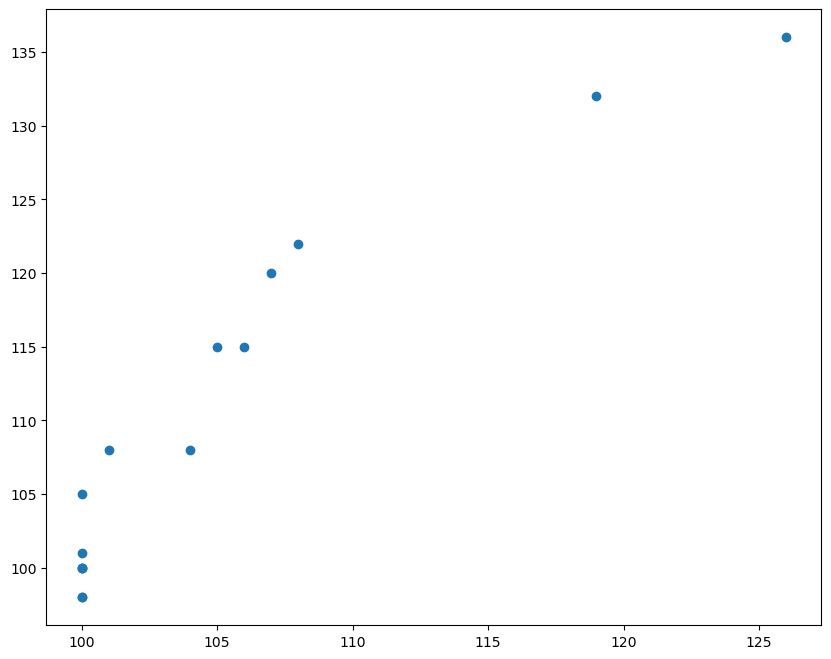

In [143]:
fig , ax = plt.subplots(figsize = (10,8))
ax.scatter( x = fastest_fpok,y= fastest_wpok);

Lightining pokemon visualization